<a href="https://colab.research.google.com/github/kaitlynri/CEG8719/blob/main/CEG3719_Assignmnet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CEG3719 Assignment 2

# Install modules

In [1]:
!pip install --upgrade geopandas
!pip install pysal
!pip install libpysal
!pip install esda
!pip install mapclassify
!pip3 install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup

In [17]:
import pysal
import seaborn
import pandas as pd
import geopandas
import numpy
import matplotlib.pyplot as plt
import contextily
from splot import esda as esdaplot
import esda as esda
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from pysal.lib import weights
import warnings
warnings.filterwarnings('ignore')

Mount the Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in geopackages


In [4]:
db1 = geopandas.read_file('/content/drive/MyDrive/CEG3719/ASSIGNMENT2/asthma_north.gpkg')

In [5]:
# Read file
db2 = geopandas.read_file("/content/drive/MyDrive/CEG3719/ASSIGNMENT2/nitrogen.gpkg")

In [6]:
print(list(db2.columns))

['objectid', 'unique_cod', 'name', 'pollutant_', 'maximum_va', 'unit', 'compliance', 'complian_1', 'globalid', 'shape_Leng', 'geometry']


In [7]:
print(list(db1.columns))

['msoa11cd', 'msoa11nm', 'msoa11nmw', 'MSOA_Km2', 'MSOA_Code', 'MSOA_Name', 'MSOA_Ha', 'AreaName', 'LA_Code20', 'LA_Name20', 'Reg_Code', 'Reg_Name', 'DATA_TYPE', 'All_Ages', 'N_0_3', 'N_4_11', 'N_12_18', 'N_19_29', 'N_30_39', 'N_40_49', 'N_50_64', 'N_65_74', 'N_75_84', 'N_85plus', 'All_Ethnic', 'WhiteBrit', 'WhiteOther', 'MixWhCarib', 'MixWhAfric', 'MixWhAsian', 'Mix_Other', 'Asian_Ind', 'Asian_Pak', 'Asian_Ban', 'Asian_Chi', 'AsianOther', 'BlackAfric', 'BlackCarib', 'BlackOther', 'Other', 'All_ReligN', 'Christian', 'Buddhist', 'Hindu', 'Jewish', 'Muslim', 'Sikh', 'OtherRelig', 'NoReligN', 'NotStated', 'DATA_TYPE2', 'GB_Sp_Ha', 'GB_Sp_Perc', 'GB_Sp_1000', 'NoProwData', 'DATA_TYPEC', 'SportOrg', 'NumSportFa', 'NumPer1000', 'DATA_TYPED', 'PopN17plus', 'PopN18plus', 'AST_Perc', 'CAN_Perc', 'CHD_Perc', 'CKD_Perc', 'DEP_Perc', 'DM_Perc', 'HYP_Perc', 'STR_Perc', 'OB_Perc', 'AST_EstNum', 'CAN_EstNum', 'CHD_EstNum', 'CKD_EstNum', 'DEP_EstNum', 'DM_EstNum', 'HYP_EstNum', 'STR_EstNum', 'OB_EstNu

In [8]:
db1['AST_tot']= db1['AST_Perc']*0.01*db1['All_Ages']

In [9]:
print(db1.columns)

db_msoa = db1.groupby('LA_Code20')[['All_Ages','AST_tot']].agg('sum')
db_msoa['AST_Perc'] = db_msoa['AST_tot']*100/db_msoa['All_Ages']
db1_check = pd.merge(db2,db_msoa,how='inner',left_on = 'unique_cod', right_on = 'LA_Code20')
db = db1_check

Index(['msoa11cd', 'msoa11nm', 'msoa11nmw', 'MSOA_Km2', 'MSOA_Code',
       'MSOA_Name', 'MSOA_Ha', 'AreaName', 'LA_Code20', 'LA_Name20',
       ...
       'Ch_Perc_Sc', 'Child_AvSc', 'Child_Sc', 'No_data', 'TOTALSCORE',
       'ExW_Sc', 'InAct_Sc', 'TOT_SCORE', 'geometry', 'AST_tot'],
      dtype='object', length=151)


In [10]:
db.head(5)

,objectid,unique_cod,name,pollutant_,maximum_va,unit,compliance,complian_1,globalid,shape_Leng,geometry,All_Ages,AST_tot,AST_Perc
0,1,E06000001,Hartlepool,Nitrogen Dioxide annual mean Limit Value 2022,21.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{E07323C2-11AB-4EBD-B938-505A273B2003},70995.722933,"MULTIPOLYGON (((447213.900 537036.104, 447206....",93663.0,6160.886334,6.577716
1,2,E06000002,Middlesbrough,Nitrogen Dioxide annual mean Limit Value 2022,37.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{6BCEDA0F-75A7-4C9D-95E3-32A2673B2127},44481.441385,"MULTIPOLYGON (((448609.900 521982.600, 448586....",140980.0,8909.905302,6.319978
2,3,E06000003,Redcar and Cleveland,Nitrogen Dioxide annual mean Limit Value 2022,21.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{7349CB65-C853-430D-BC87-ED7652076C03},96704.031525,"MULTIPOLYGON (((455932.335 527880.697, 455939....",137150.0,9164.332279,6.681978
3,4,E06000004,Stockton-on-Tees,Nitrogen Dioxide annual mean Limit Value 2022,35.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{79140BCC-9D16-4C9D-8D4B-70204D3EF46A},123408.788096,"MULTIPOLYGON (((444157.002 527956.304, 444139....",197348.0,11756.193668,5.957088
4,5,E06000005,Darlington,Nitrogen Dioxide annual mean Limit Value 2022,23.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{0EF1B379-CDFD-4D9A-AA7C-C6961D6A19C1},107203.152334,"MULTIPOLYGON (((423496.602 524724.299, 423475....",106803.0,6771.266163,6.339959


# Exploring the contents of the Geopandas geodataframe

In [11]:
print("Geopandas Info:")
print(db.info())
print("\n")
print("Geopandas columns (these are same as fields/attributes):")
print(db.columns)
print("\n")
print("Geopandas top few lines of the actual data")
db.head()

Geopandas Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    82 non-null     int64   
 1   unique_cod  82 non-null     object  
 2   name        82 non-null     object  
 3   pollutant_  82 non-null     object  
 4   maximum_va  82 non-null     float64 
 5   unit        82 non-null     object  
 6   compliance  82 non-null     object  
 7   complian_1  82 non-null     object  
 8   globalid    82 non-null     object  
 9   shape_Leng  82 non-null     float64 
 10  geometry    82 non-null     geometry
 11  All_Ages    82 non-null     float64 
 12  AST_tot     82 non-null     float64 
 13  AST_Perc    82 non-null     float64 
dtypes: float64(5), geometry(1), int64(1), object(7)
memory usage: 9.1+ KB
None


Geopandas columns (these are same as fields/attributes):
Index(['objectid', 'unique_cod', 'name', 'pollutant_', 'maximu

,objectid,unique_cod,name,pollutant_,maximum_va,unit,compliance,complian_1,globalid,shape_Leng,geometry,All_Ages,AST_tot,AST_Perc
0,1,E06000001,Hartlepool,Nitrogen Dioxide annual mean Limit Value 2022,21.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{E07323C2-11AB-4EBD-B938-505A273B2003},70995.722933,"MULTIPOLYGON (((447213.900 537036.104, 447206....",93663.0,6160.886334,6.577716
1,2,E06000002,Middlesbrough,Nitrogen Dioxide annual mean Limit Value 2022,37.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{6BCEDA0F-75A7-4C9D-95E3-32A2673B2127},44481.441385,"MULTIPOLYGON (((448609.900 521982.600, 448586....",140980.0,8909.905302,6.319978
2,3,E06000003,Redcar and Cleveland,Nitrogen Dioxide annual mean Limit Value 2022,21.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{7349CB65-C853-430D-BC87-ED7652076C03},96704.031525,"MULTIPOLYGON (((455932.335 527880.697, 455939....",137150.0,9164.332279,6.681978
3,4,E06000004,Stockton-on-Tees,Nitrogen Dioxide annual mean Limit Value 2022,35.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{79140BCC-9D16-4C9D-8D4B-70204D3EF46A},123408.788096,"MULTIPOLYGON (((444157.002 527956.304, 444139....",197348.0,11756.193668,5.957088
4,5,E06000005,Darlington,Nitrogen Dioxide annual mean Limit Value 2022,23.0,μg m⁻³,Compliant,Limit Value: 40 μg m⁻³,{0EF1B379-CDFD-4D9A-AA7C-C6961D6A19C1},107203.152334,"MULTIPOLYGON (((423496.602 524724.299, 423475....",106803.0,6771.266163,6.339959


There are 82 entries and 14 different attributes.


# Mapping the data

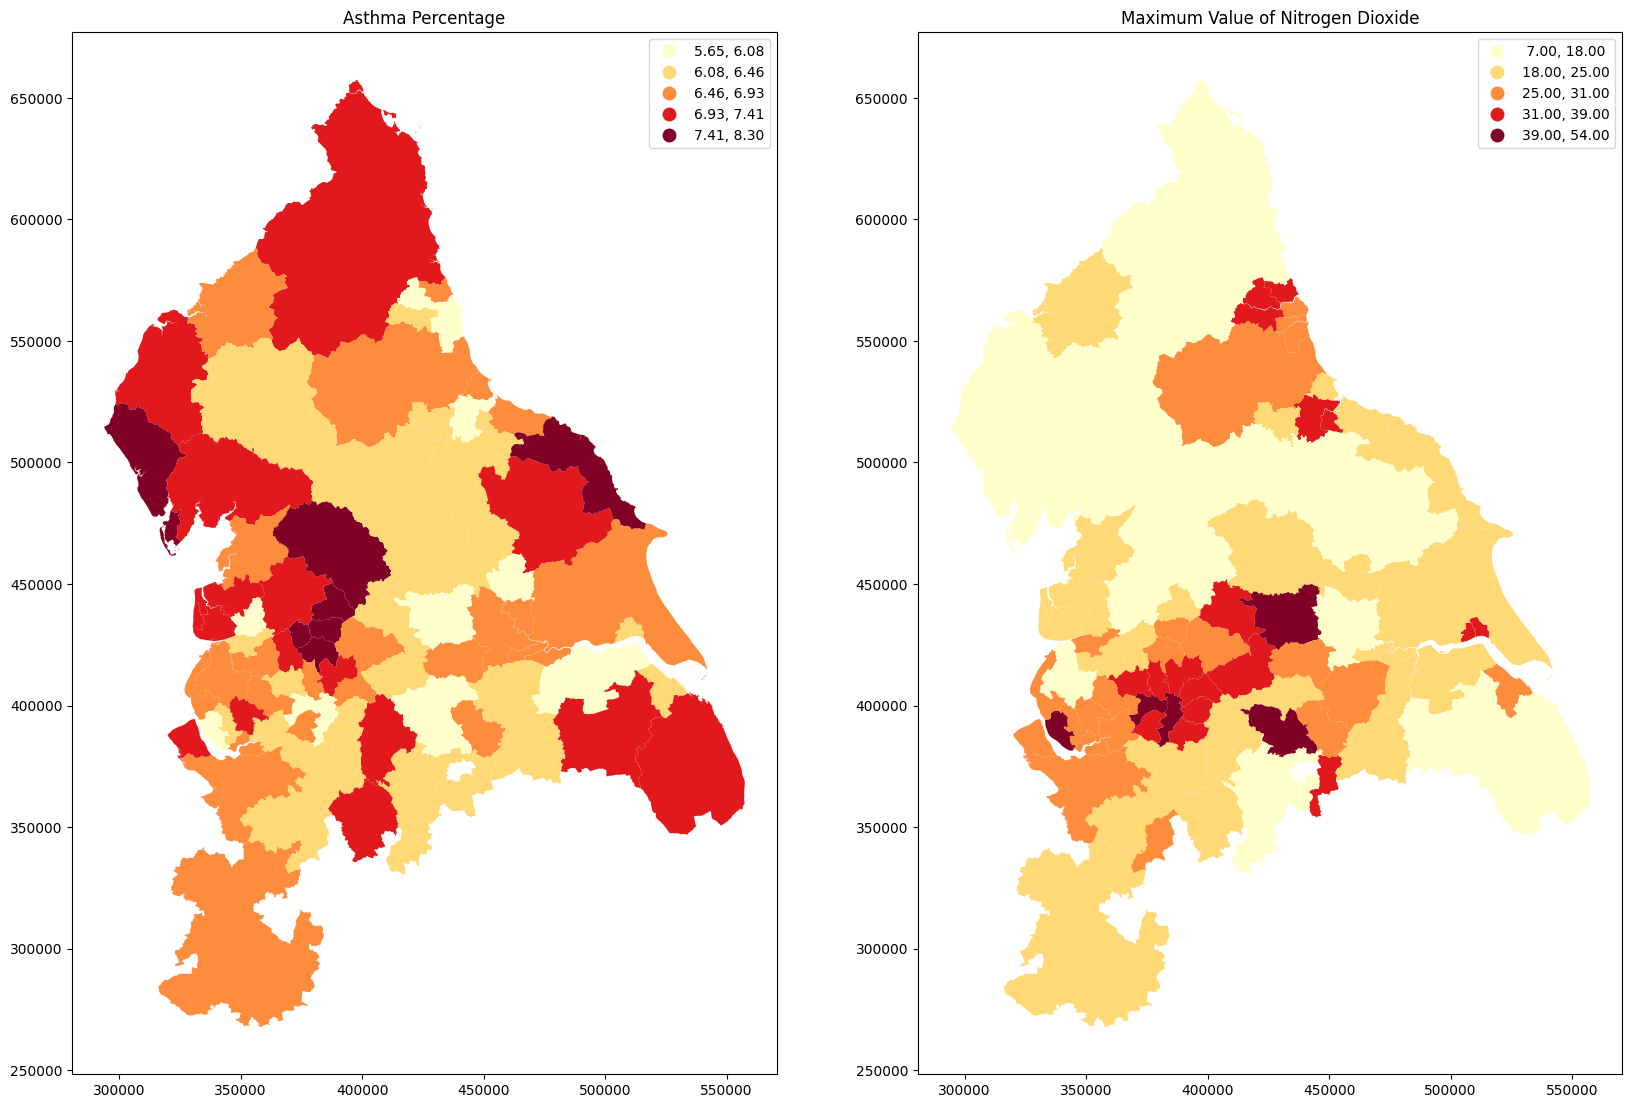

In [12]:
# Choose the columns that we want to plot.
attributes = ['AST_Perc','maximum_va']

# Set up the plot
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop
for i, col in enumerate(attributes):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map.
    db.plot(column=col, scheme="fisherjenks", cmap="YlOrRd", legend=True, linewidth=0, ax=ax)
    # Set the axis title to the name of attribute being plotted
    ax.set_title(['Asthma Percentage','Maximum Value of Nitrogen Dioxide'][i])
# Display the figure
plt.show()


#Explaratory Data Analysis


First looking at the histograms of the percentage of individuals with asthma and the maximum value of nitrogen dioxide

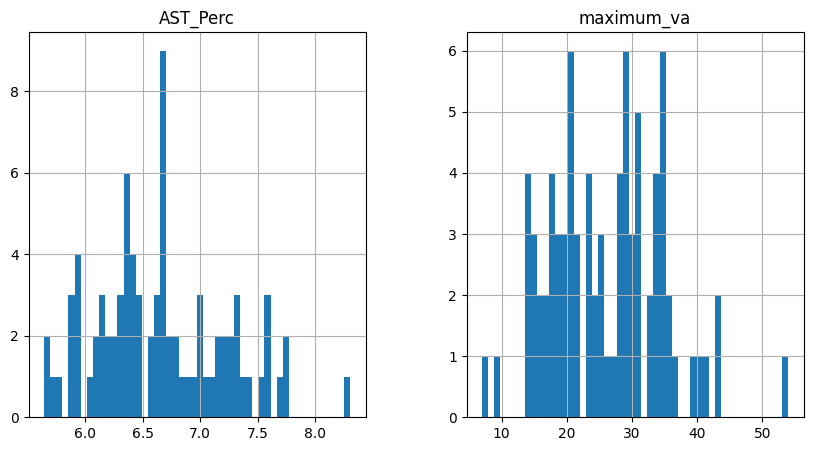

In [13]:
# Set up the plot
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# Plot each histogram
db.hist(ax=axes[0], column='AST_Perc', bins=50)
db.hist(ax=axes[1], column='maximum_va', bins=50)
plt.show()

Now looking at the cdf of the two attributes

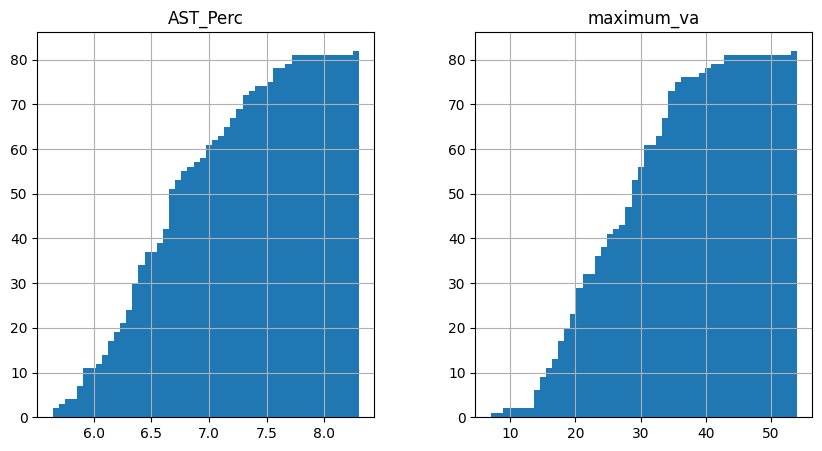

In [14]:
# Set up the plot
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# Plot each cdf
attributes = ['AST_Perc','maximum_va']
db.hist(ax=axes[0], column='AST_Perc', bins=50, cumulative=True)
db.hist(ax=axes[1], column='maximum_va', bins=50, cumulative=True)
plt.show()

Next we will look at some descriptive statistics of the geopackage

In [15]:
# print the mean of each column (attribute).
print("Mean")
print(db.mean(numeric_only=True))
print("\n")

# Print the standard deviation of each column (attribute).
print("Standard Deviation")
print(db.std(numeric_only=True, ddof=0))

Mean
objectid         150.548780
maximum_va        26.146341
shape_Leng    162768.218701
All_Ages      192825.353659
AST_tot        12474.803388
AST_Perc           6.655140
dtype: float64


Standard Deviation
objectid          95.170598
maximum_va         8.598244
shape_Leng    117733.398920
All_Ages      150087.400327
AST_tot         9150.280402
AST_Perc           0.561465
dtype: float64


# Analysis

## Local Spatial Autocorrelation - Anslin's local Moran I

In [18]:
# Calculate the weights - inverse of distance to all features in this instance.
# Row standardise the weights
w = weights.distance.Kernel.from_dataframe(db)
w.transform = "R"
# Calculate Anslin's local Moran's I.
moran_local = esda.moran.Moran_Local(db["AST_Perc"], w)


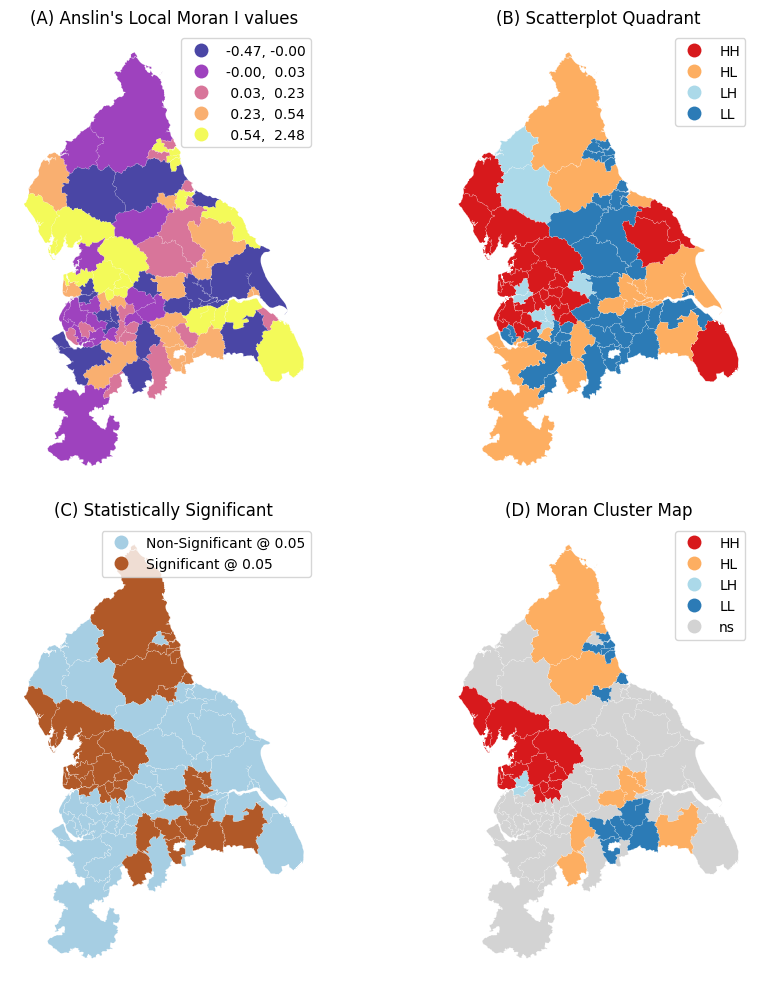

In [19]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Set title
ax.set_title("(A) Anslin's Local Moran I values")
# Assign new column with local statistics on-the-fly
db.assign(
    MoranLocal=moran_local.Is
    # Plot choropleth of local statistics
).plot(
    column="MoranLocal",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)
# Remove axis
ax.set_axis_off()

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Set title
ax.set_title("(B) Scatterplot Quadrant")
# Plot Quadrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(moran_local, db, p=1, ax=ax)
# Set axes labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
# Set title
ax.set_title("(C) Statistically Significant")
# Find out significant observations
labels = pd.Series(
    1 * (moran_local.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=db.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant @ 0.05", 0: "Non-Significant @ 0.05"})
# Assign labels to `db` on the fly
db.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)
# Remove axis
ax.set_axis_off()

# Subplot 4 #
# Cluster map
# Grab fourth axis of local statistics
ax = axs[3]
# Set title
ax.set_title("(D) Moran Cluster Map")
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(moran_local, db, p=0.05, ax=ax)
# Set axes labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# Figure styling #
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()


The local Moran I for asthma percentage can be seen.

In [20]:
from splot import esda as esdaplot
# Calculate the weights - inverse of distance to all features in this instance.
# Row standardise the weights
w = weights.distance.Kernel.from_dataframe(db)
w.transform = "R"
# Calculate Anslin's local Moran's I.
moran_local = esda.moran.Moran_Local(db["maximum_va"], w)


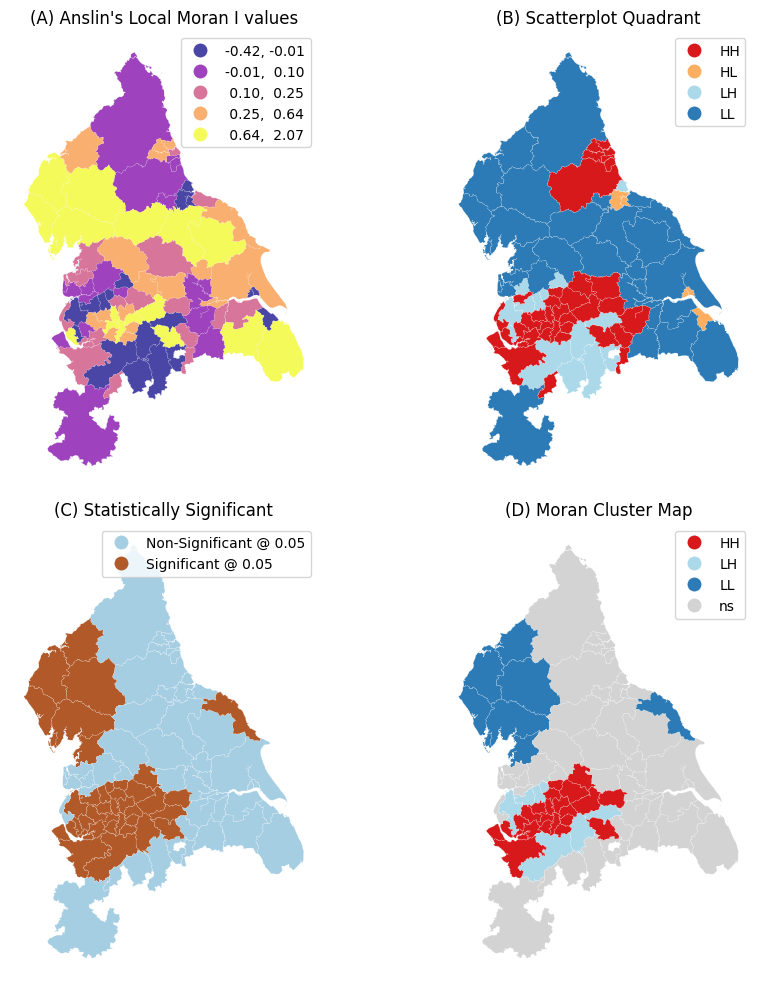

In [21]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
ax = axs[0]
# Set title
ax.set_title("(A) Anslin's Local Moran I values")
# Assign new column with local statistics on-the-fly
db.assign(
    MoranLocal=moran_local.Is
    # Plot choropleth of local statistics
).plot(
    column="MoranLocal",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)
# Remove axis
ax.set_axis_off()

# Subplot 2
ax = axs[1]
# Set title
ax.set_title("(B) Scatterplot Quadrant")
esdaplot.lisa_cluster(moran_local, db, p=1, ax=ax)


# Subplot 3
# Significance map
ax = axs[2]
# Set title
ax.set_title("(C) Statistically Significant")
# Find out significant observations
labels = pd.Series(
    1 * (moran_local.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=db.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant @ 0.05", 0: "Non-Significant @ 0.05"})
# Assign labels to `db` on the fly
db.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)
# Remove axis
ax.set_axis_off()

# Subplot 4
# Cluster map
ax = axs[3]
# Set title
ax.set_title("(D) Moran Cluster Map")
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(moran_local, db, p=0.05, ax=ax)


# Figure styling
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()


The local Moran I for nitrogen dioxide maximum values can be seen.

## Geographically Weighted Regression

In [22]:
# Obtain OA centroids and convert to a numpy dataframe.
gwr_X = db["maximum_va"].values.reshape((-1,1))
gwr_Y = db["AST_Perc"].values.reshape((-1,1))
centroids = db.copy()
centroids['geometry'] = centroids['geometry'].centroid
u = centroids.geometry.x
v = centroids.geometry.y
gwr_coords = list(zip(u,v))
# Obtain GWR bandwidth.
gwr_selector = Sel_BW(gwr_coords, gwr_Y, gwr_X)
gwr_bw = gwr_selector.search()
print("GWR Bandwidth =", gwr_bw)

GWR Bandwidth = 53.0


In [23]:
gwr_results = GWR(gwr_coords, gwr_Y, gwr_X, gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  82
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             19.820
Log-likelihood:                                                     -58.132
AIC:                                                                120.264
AICc:                                                               122.572
BIC:                                                               -332.717
R2:                                                                   0.233
Adj. R2:                                                              0.224

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

Including local geographical pattern improves the fit from an R^2 of 0.233 to an R^2 of 0.419

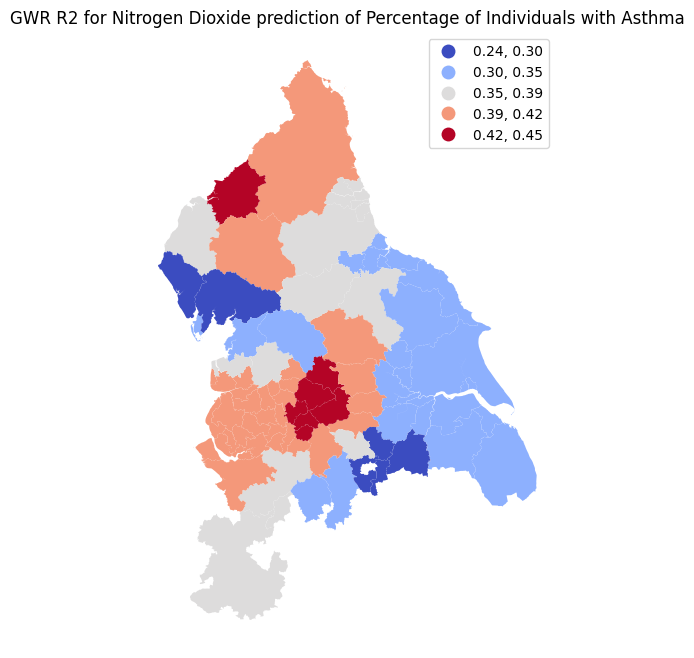

In [24]:
# Add the R2 values to the Geodataframe & plot.
db["GWR_R2"] = gwr_results.localR2
f, ax = plt.subplots(1, figsize=(8, 8))
db.plot(column="GWR_R2", scheme="fisherjenks", cmap="coolwarm", legend=True, k=5, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("GWR R2 for Nitrogen Dioxide prediction of Percentage of Individuals with Asthma")
plt.show()


Clearly the R^2 value changes by location

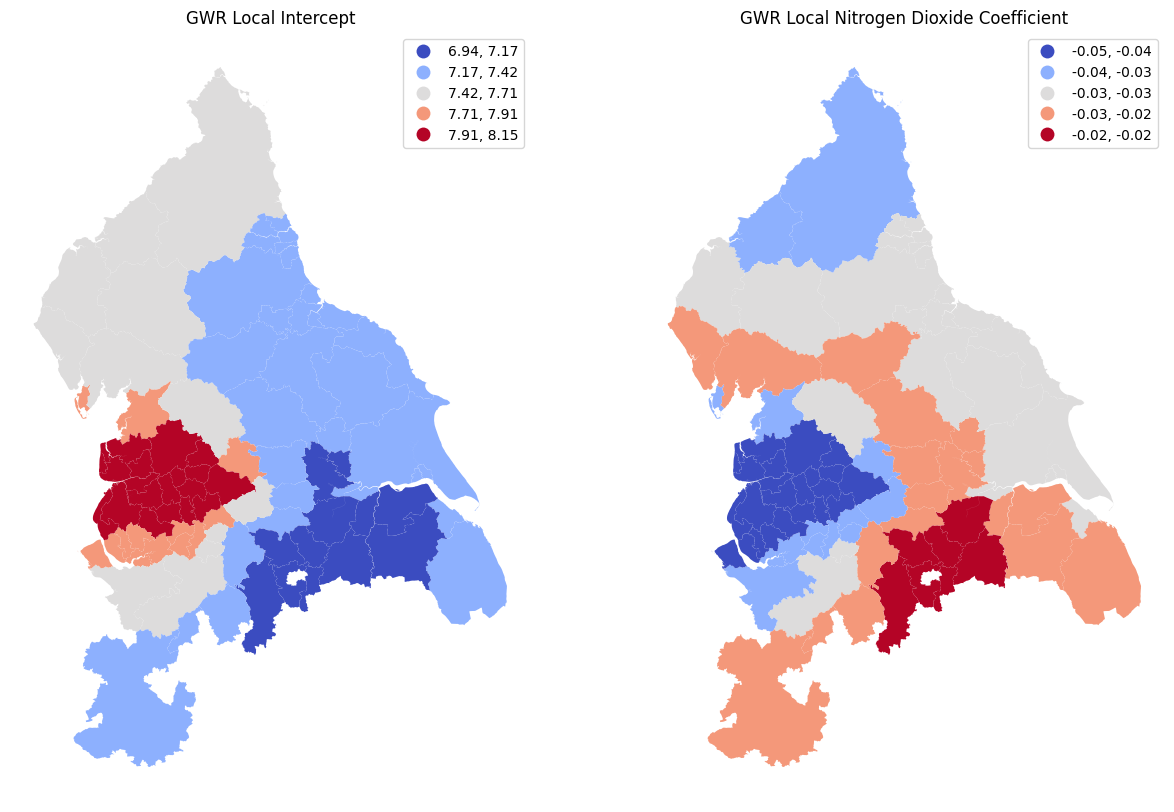

In [25]:
# Add the coefficients to the Geodataframe.
db["Intercept_Coeff"] = gwr_results.params[:,0]
db["GWR_PercentMng_Coeff"] = gwr_results.params[:,1]
# Plot the local coefficient.
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax=axs[0]
db.plot(column="Intercept_Coeff", scheme="fisherjenks", cmap="coolwarm", legend=True, k=5, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("GWR Local Intercept")
ax=axs[1]
db.plot(column="GWR_PercentMng_Coeff", scheme="fisherjenks", cmap="coolwarm", legend=True, k=5, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("GWR Local Nitrogen Dioxide Coefficient")
plt.show()


The intercept and coefficent changes with location also

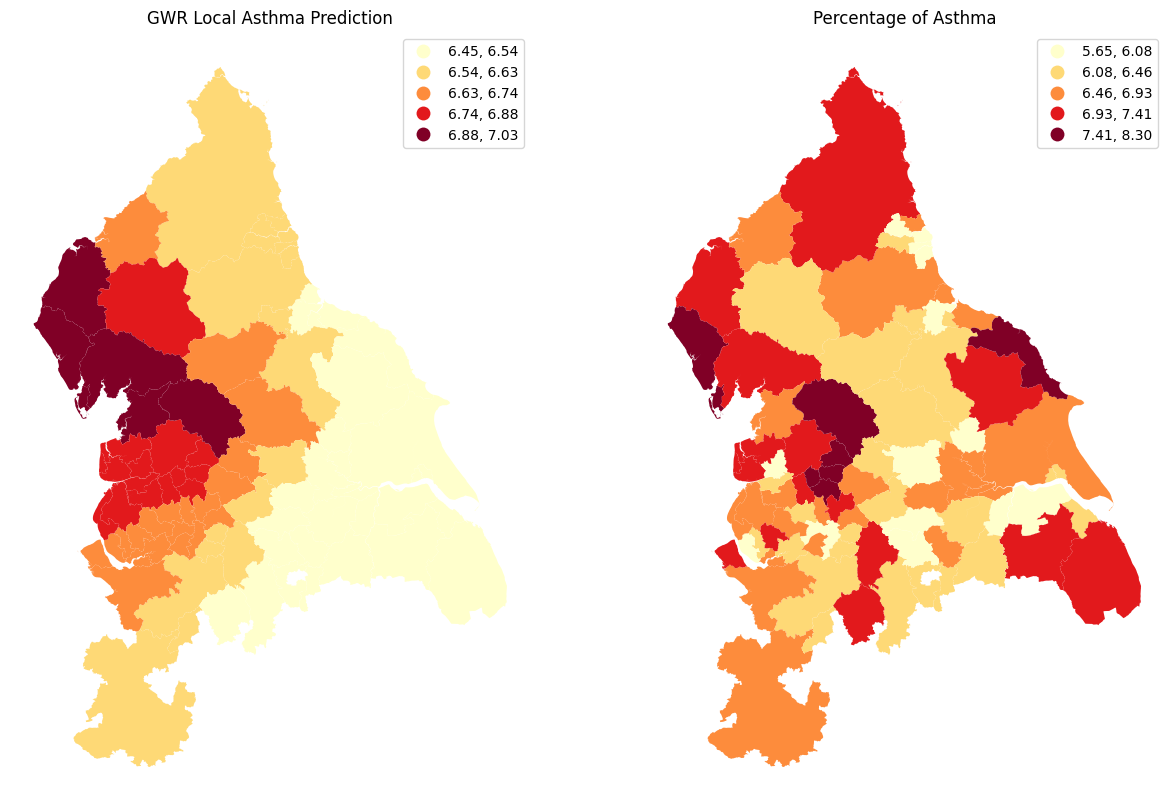

In [26]:
# Add the prediction to the Geodataframe.
db["AST_Perc_Prediction"] = gwr_results.y_bar
# Plot the prediction
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax=axs[0]
db.plot(column="AST_Perc_Prediction", scheme="fisherjenks", cmap="YlOrRd", legend=True, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("GWR Local Asthma Prediction")
ax=axs[1]
db.plot(column="AST_Perc", scheme="fisherjenks", cmap="YlOrRd", legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
ax.set_title("Percentage of Asthma")
plt.show()

The prediction does not appear to be very accurate


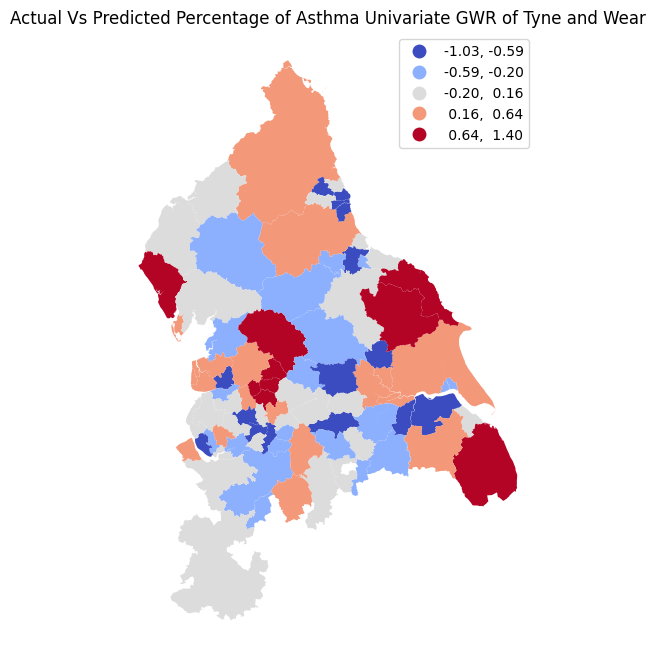

In [27]:
# Calculate the difference between actual and predicted
db["AST_Perc_Difference"] = db["AST_Perc"] - db["AST_Perc_Prediction"]
# Plot the difference.
f, ax = plt.subplots(1, figsize=(8, 8))
db.plot(column="AST_Perc_Difference", scheme="fisherjenks", cmap="coolwarm", legend=True, k=5, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("Actual Vs Predicted Percentage of Asthma Univariate GWR of Tyne and Wear")
plt.show()

A plot showing the difference between actual and predicted values

## Artifical Neural Network - Binary Neural Network Classifier

First defining an area as above median asthma

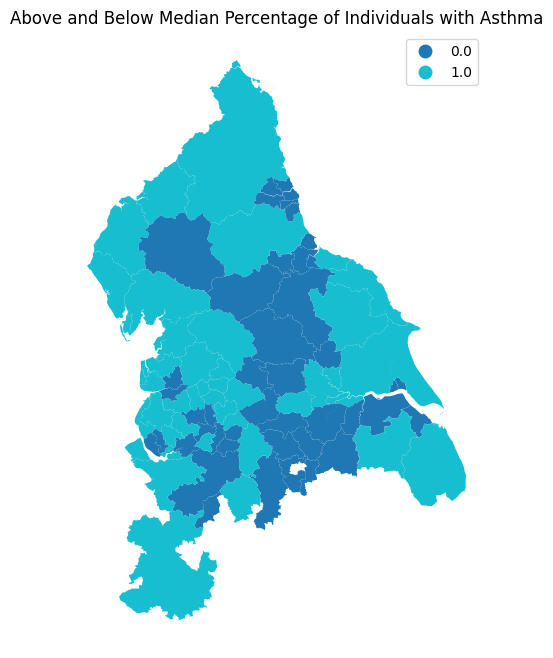

In [28]:
# Derive from the binary variable
# Above = 1, below = 0
db.loc[db["AST_Perc"] > 6.641347, "Above-Median-Asthma"] = 1
db.loc[db["AST_Perc"] <= 6.641347, "Above-Median-Asthma"] = 0

# Plot the boolean map showing the distribution of above/below.
f, ax = plt.subplots(1, figsize=(8, 8))
db.plot(column="Above-Median-Asthma", categorical=True, legend=True, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("Above and Below Median Percentage of Individuals with Asthma")
plt.show()

Preparing the Training and Testing Data




In [29]:
# Set the target varaible and predictor varaibles
targetvar = ["Above-Median-Asthma"]
predictors = ['maximum_va']

# Obatin the actual data values
targetvar_data = db[targetvar].values
predictor_data = db[predictors].values
print("Target variable Above-Median-Asthma dimensions:", targetvar_data.shape)
print("Predictor variable dimensions:", predictor_data.shape)

# Standardize the predictor data - to have all varaibles fall in the range 0 to 1.
from sklearn.preprocessing import StandardScaler
predictor_scaler = StandardScaler()
predictor_scaler_fit=predictor_scaler.fit(predictor_data)
predictor_data = predictor_scaler.transform(predictor_data)


Target variable Above-Median-Asthma dimensions: (82, 1)
Predictor variable dimensions: (82, 1)


Split the data into training and testing (50% training, 50% testing).

In [30]:
predictor_data_train, predictor_data_test, targetvar_data_train, targetvar_data_test = train_test_split(predictor_data, targetvar_data, test_size = 0.50, random_state = 42)
print("Training Predictor data dimensions:", predictor_data_train.shape)
print("Training Target data dimensions:", targetvar_data_train.shape)
print("Testing Predictor data dimensions:", predictor_data_test.shape)
print("Testing Target Data dimensions:", targetvar_data_test.shape)

Training Predictor data dimensions: (41, 1)
Training Target data dimensions: (41, 1)
Testing Predictor data dimensions: (41, 1)
Testing Target Data dimensions: (41, 1)


Make the ANN


In [31]:
# Select a feedforwad backward peopagation network.
classifier = keras.Sequential()

# Defining the Input layer
classifier.add(layers.Dense(units=10, input_dim=1, kernel_initializer='uniform', activation='relu'))

# Defining the SECOND hidden layer
classifier.add(layers.Dense(units=10, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
classifier.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit to the training data
median_asthma_ann_model = classifier.fit(predictor_data_train, targetvar_data_train, batch_size=10 , epochs=10, verbose=1)


Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5122
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5122
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5122
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5122
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5122
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5122
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5122
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5122
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5122
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5122


We got an accuracy of 0.5122

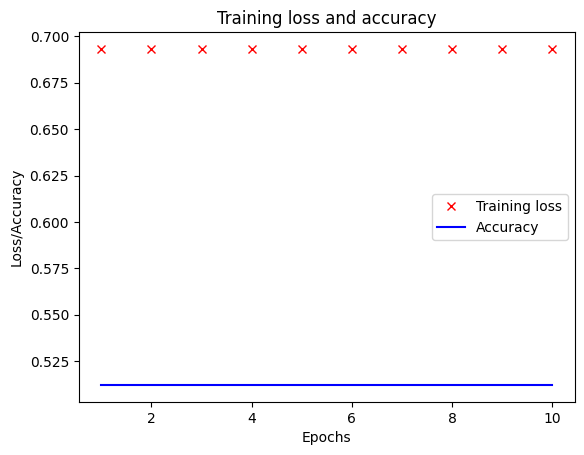

In [32]:
# Plot loss and accuraccy
loss = median_asthma_ann_model.history["loss"]
accuracy = median_asthma_ann_model.history["accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "rx", label="Training loss")
plt.plot(epochs, accuracy, "b", label="Accuracy")
plt.title("Training loss and accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Predicting with the ANN

2/2 [==============================] - 0s 5ms/step
Overall Accuracy (%) =  48.78048780487805


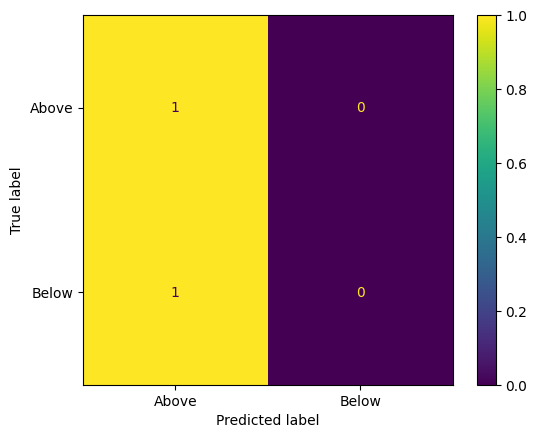

In [33]:
predictor_data_test_classified = classifier.predict(predictor_data_test)

# If probability > 0.5 classify as Above Median Asthma, otherwise 0
testing_data = pd.DataFrame()
testing_data["AboveMedianAsthma"] = list(targetvar_data_test)
testing_data["PredictionProbability"] = predictor_data_test_classified
testing_data.loc[testing_data["PredictionProbability"] > 0.5, "AboveMedianAsthmaPrediction"] = 1
testing_data.loc[testing_data["PredictionProbability"] <= 0.5, "AboveMedianAsthmaPrediction"] = 0
testing_data["AboveMedianAsthma"] = testing_data["AboveMedianAsthma"].astype(float)
testing_data["AboveMedianAsthmaPrediction"] = testing_data["AboveMedianAsthmaPrediction"].astype(float)

# display results
cm = confusion_matrix(testing_data["AboveMedianAsthma"], testing_data["AboveMedianAsthmaPrediction"], normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Above','Below'])
cmd.plot()

# Report the overall accurcay
acc = accuracy_score(testing_data["AboveMedianAsthma"], testing_data["AboveMedianAsthmaPrediction"])
print("Overall Accuracy (%) = ", acc*100)

The ANN is around 48.78% accurate, this is worse than chance

Looking at the prediction

3/3 [==============================] - 0s 3ms/step


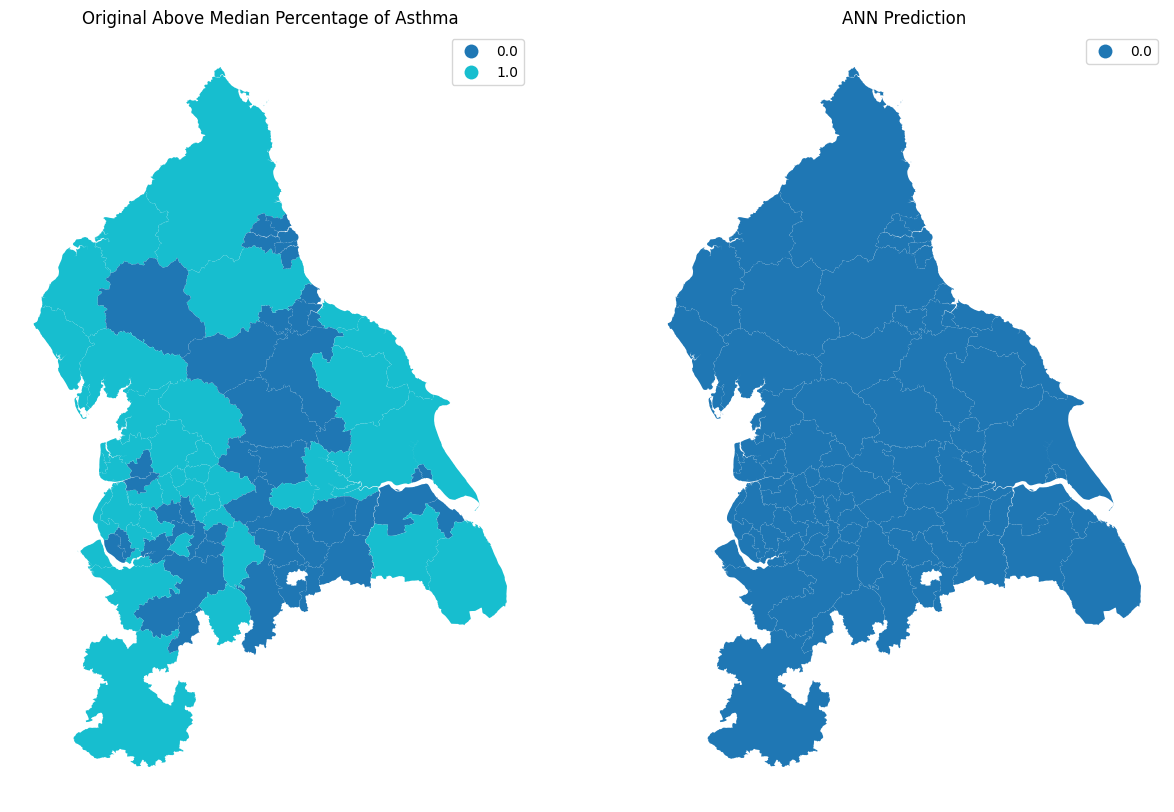

In [34]:
predictor_data_classified = classifier.predict(predictor_data)
db["PredictionProbability"] = predictor_data_classified
db.loc[db["PredictionProbability"] > 0.5, "AboveMedianAsthmaPrediction"] = 1
db.loc[db["PredictionProbability"] <= 0.5, "AboveMedianAsthmaPrediction"] = 0

# Plot the original and ANN predicted
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax=axs[0]
db.plot(column="Above-Median-Asthma", categorical=True, legend=True, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("Original Above Median Percentage of Asthma")
ax=axs[1]
db.plot(column="AboveMedianAsthmaPrediction", categorical=True, legend=True, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("ANN Prediction")
plt.show()

 ### Tune Hyperparameters




In [35]:
# Defining hyperparameters to try
trial_no=0
batch_size_list=[5, 10, 15, 20]
epoch_list=[5, 10, 20, 50, 100]

# Create a new dataframe to hold the hyperparameter search results.
search_results = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

# Grid method - use a nested loop to search across the batch size and epoch dimensions.
for batch_size_trial in batch_size_list:
  for epochs_trial in epoch_list:
    trial_no+=1

    # Creating the ANN model for the hyperparameters.
    classifier = keras.Sequential()
    classifier.add(layers.Dense(units=10, input_dim=1, kernel_initializer='uniform', activation='relu'))
    classifier.add(layers.Dense(units=10, kernel_initializer='uniform', activation='relu'))
    classifier.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    search_model=classifier.fit(predictor_data_train, targetvar_data_train, batch_size=batch_size_trial, epochs=epochs_trial, verbose=0)

    # Obtain the accuracy of the training for the current hyperparameter setting(s).
    search_accuracy = search_model.history['accuracy'][-1]

    # printing the results of the current iteration.
    print(trial_no, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:', epochs_trial, 'Accuracy:', search_accuracy)
    search_results = pd.concat([search_results, pd.DataFrame([[trial_no, 'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), search_accuracy]], columns=['TrialNumber', 'Parameters', 'Accuracy'])], ignore_index=True)



1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.5121951103210449
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.4878048896789551
3 Parameters: batch_size: 5 - epochs: 20 Accuracy: 0.707317054271698
4 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.707317054271698
5 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.6585366129875183
6 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.5121951103210449
7 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.5121951103210449
8 Parameters: batch_size: 10 - epochs: 20 Accuracy: 0.5609756112098694
9 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.707317054271698
10 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.707317054271698
11 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.5121951103210449
12 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.5121951103210449
13 Parameters: batch_size: 15 - epochs: 20 Accuracy: 0.6585366129875183
14 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.6585366129875183
15 Paramete

Now plotting these results

   TrialNumber             Parameters  Accuracy
19          20  batch_size20-epoch100  0.707317


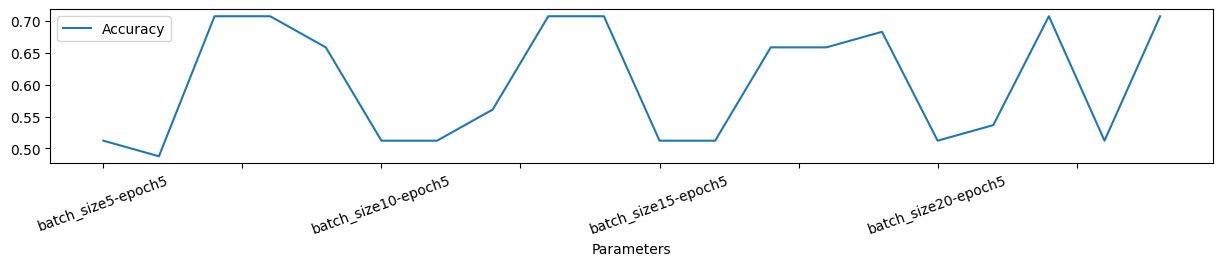

In [36]:
# Print the best hyperparameter set.
print(search_results.sort_values(by='Accuracy', ascending=False).head(1))

# Plot the results.
%matplotlib inline
_ = search_results.plot(x='Parameters', y='Accuracy', figsize=(15,2), kind='line', rot=20)

We have the best results for a batch size of 5 and 50 epochs.

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7073
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7073
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7073
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7073
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7073
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7073
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7073
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7073
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7073
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7073
Epoch 11/100
9/9 [===========

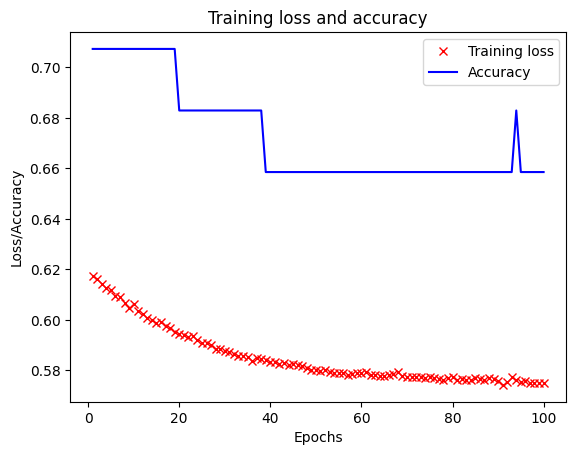

2/2 [==============================] - 0s 5ms/step
Overall Accuracy (%) =  60.97560975609756
3/3 [==============================] - 0s 3ms/step


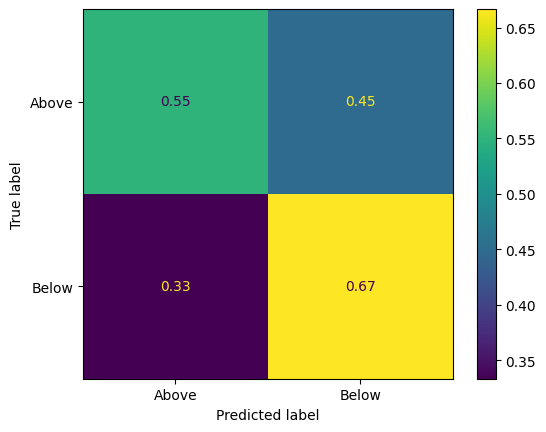

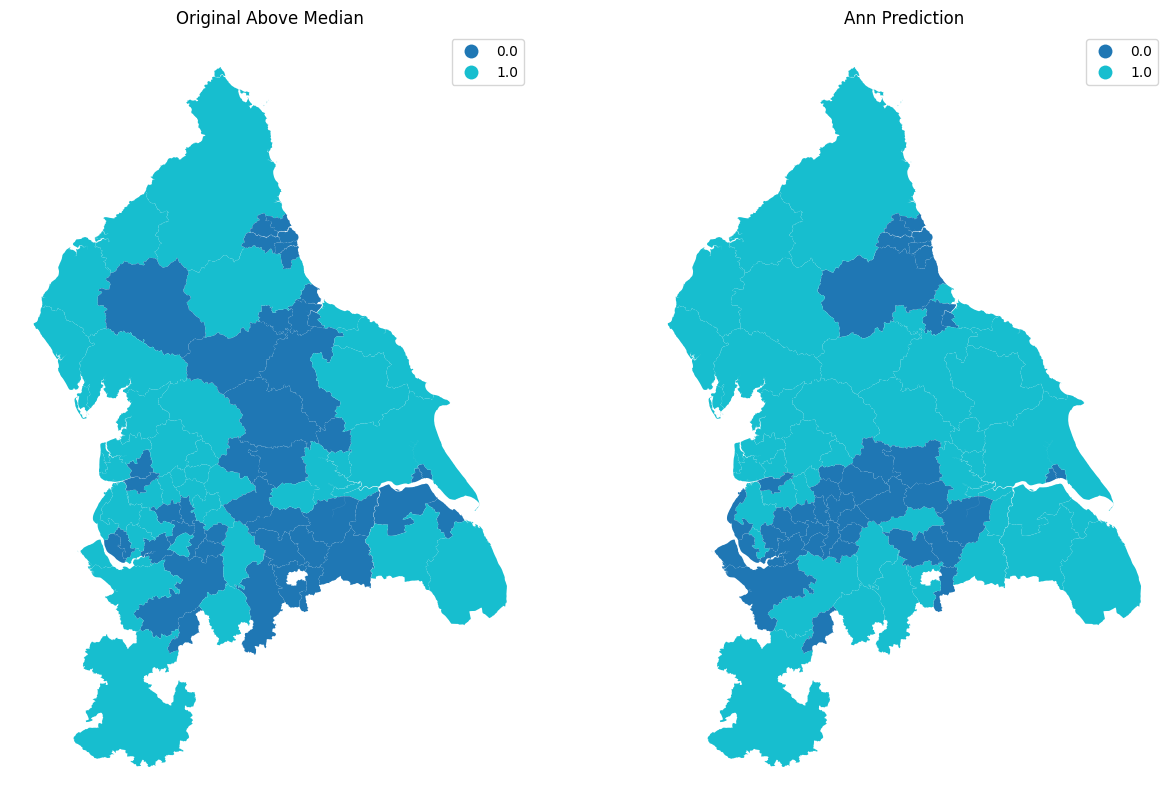

In [37]:
# Train the ANN for the optimal values of batch size and epochs.
median_asthma_ann_model = classifier.fit(predictor_data_train, targetvar_data_train, batch_size=5 , epochs=100, verbose=1)

# Plot the training loss/accuracy.
loss = median_asthma_ann_model.history["loss"]
accuracy = median_asthma_ann_model.history["accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "rx", label="Training loss")
plt.plot(epochs, accuracy, "b", label="Accuracy")
plt.title("Training loss and accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Classify the testing data
predictor_data_test_classified = classifier.predict(predictor_data_test)

# Put the probability of being above the median percentage of asthma .
# If probability > 0.5 classify as Above Median asthma , otherwise 0.
testing_data = pd.DataFrame()
testing_data["AboveMedianAsthma"] = list(targetvar_data_test)
testing_data["PredictionProbability"] = predictor_data_test_classified
testing_data.loc[testing_data["PredictionProbability"] > 0.5, "AboveMedianAsthmaPrediction"] = 1
testing_data.loc[testing_data["PredictionProbability"] <= 0.5, "AboveMedianAsthmaPrediction"] = 0
testing_data["AboveMedianAsthma"] = testing_data["AboveMedianAsthma"].astype(float)
testing_data["AboveMedianAsthmaPrediction"] = testing_data["AboveMedianAsthmaPrediction"].astype(float)
#plotting accuracy of predictions
cm = confusion_matrix(testing_data["AboveMedianAsthma"], testing_data["AboveMedianAsthmaPrediction"], normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Above','Below'])
cmd.plot()

# Report the overall accurcay
acc = accuracy_score(testing_data["AboveMedianAsthma"], testing_data["AboveMedianAsthmaPrediction"])
print("Overall Accuracy (%) = ", acc*100)

# Classify
predictor_data_classified = classifier.predict(predictor_data)
db["PredictionProbability"] = predictor_data_classified
db.loc[db["PredictionProbability"] > 0.5, "AboveMedianAsthmaPrediction"] = 1
db.loc[db["PredictionProbability"] <= 0.5, "AboveMedianAsthmaPrediction"] = 0

# Plot the original and ANN predicted.
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax=axs[0]
db.plot(column="Above-Median-Asthma", categorical=True, legend=True, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("Original Above Median")
ax=axs[1]
db.plot(column="AboveMedianAsthmaPrediction", categorical=True, legend=True, linewidth=0.5, ax=ax)
ax.set_axis_off()
ax.set_title("Ann Prediction")
plt.show()
